In [1]:
# load data
import numpy as np
import pandas as pd


In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X = data.iloc[:, [2, 3]].values
X[:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]], dtype=int64)

In [4]:
X_1 = data.iloc[:, 2:4].values
X_1[:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]], dtype=int64)

In [15]:
y = data.iloc[:, -1].values
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [ ]:
# standardize 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# help(StandardScaler)

In [7]:
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

E:\Users\RaiYi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
X[:5]

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059]])

In [9]:
standard_scaler.mean_

array([3.76550e+01, 6.97425e+04])

In [10]:
standard_scaler.var_

array([1.09615975e+02, 1.15969619e+09])

In [ ]:
# split
from sklearn.model_selection import train_test_split
# help(train_test_split)


In [11]:
# fit 
from sklearn.linear_model import LogisticRegression

In [ ]:
help(LogisticRegression)

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=1/4, random_state=0)

In [18]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
y_pred = lr_classifier.predict(X_test)

In [21]:
# evaluation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

In [23]:
lr_classifier.score(X_test, y_test)

0.89

In [34]:
65/(65+ 8)

0.8904109589041096

In [28]:
def print_p_r_curve(precision, recall, ap):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(ap ))
    plt.show()
    
def print_roc_curve(fpr, tpr, auc):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
def print_metrics(true, pre, pro):
    from sklearn import metrics
    print("Accuracy Score is %.5f" % metrics.accuracy_score(true, pre))
    print("Precision is %.5f" % metrics.precision_score(true, pre))
    print("Recall is %.5f" % metrics.recall_score(true, pre))
    print("F1 Score is %.5f" % metrics.f1_score(true,pre))
    print("F0.5 Score is %.5f" % metrics.fbeta_score(true,pre,0.5))
    ap = metrics.average_precision_score(true,pro)
    print("Average Precision Score is %.5f" % ap)
    precision, recall, thresholds = metrics.precision_recall_curve(true, pro)
    print_p_r_curve(precision,recall,ap)
    
    fpr, tpr, thresholds = metrics.roc_curve(true, pro)
    auc = metrics.auc(fpr, tpr)
    print("Auc is %.5f" % auc)
    print_roc_curve(fpr, tpr, auc)

In [ ]:
from sklearn import metrics
# help(metrics.precision_score)

Accuracy Score is 0.89000
Precision is 0.88889
Recall is 0.75000
F1 Score is 0.81356
F0.5 Score is 0.85714
Average Precision Score is 0.90320


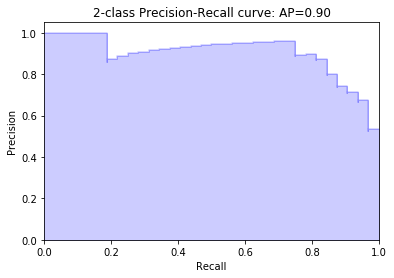

Auc is 0.95404


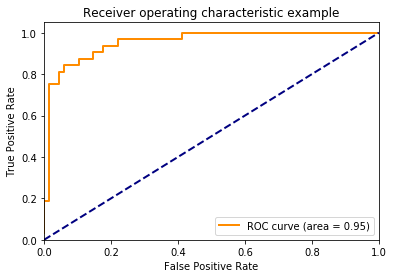

In [29]:
pro=lr_classifier.predict_proba(X_test)[:,1] 
print_metrics(y_test, y_pred, pro)

In [35]:
# 先划分trainset 和 testset，然后 各自标准化

data = pd.read_csv('Social_Network_Ads.csv')
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=1/4, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
y_pred = lr_classifier.predict(X_test)
# evaluation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

E:\Users\RaiYi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[63,  5],
       [ 7, 25]], dtype=int64)

In [37]:
# MinMaxScaler
data = pd.read_csv('Social_Network_Ads.csv')
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, -1].values
sc = MinMaxScaler()
X= sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=1/4, random_state=0)

lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
y_pred = lr_classifier.predict(X_test)
# evaluation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

E:\Users\RaiYi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[67,  1],
       [10, 22]], dtype=int64)

In [38]:
# MinMaxScaler
data = pd.read_csv('Social_Network_Ads.csv')
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=1/4, random_state=0)
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
y_pred = lr_classifier.predict(X_test)
# evaluation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

E:\Users\RaiYi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[67,  1],
       [10, 22]], dtype=int64)

In [39]:
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics.classification:

confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
    Compute confusion matrix to evaluate the accuracy of a classification
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` but
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array, shape = [n_samples]
        Ground truth (correct) target values.
    
    y_pred : array, shape = [n_samples]
        Estimated targets as returned by a classifier.
    
    labels : array, shape = [n_classes], optional
        List of labels to index the m